# Small-Angle Approximations 

## Matthew Yuen 

The purpose of this python notebook is to demonstrate visually and mathematically various small-angle approximations of basic trig functions $\sin(x), \cos(x), \tan(x)$. 

Mathematically, we can approximate these three trig functions through observation of their limits which gives: 

$\sin(x) \approx x$ 
    
$\cos(x) \approx 1-\frac{x^2}{2}$ 
    
$\tan(x) \approx x$ 

## Contents

    1.1: Visual Observation
    1.2: Calculus Proof 
    1.3: Algebraic Proof 
    1.4: Bhaskara I's Aproximation 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
% matplotlib inline

### 1.1 - Observing the approximations visually 

First we can compare $x$ with $\sin(x), \text{and} \tan(x)$ 

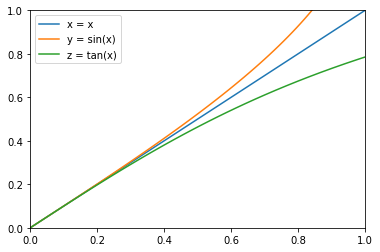

In [22]:
x = np.linspace(0,1)
y = np.sin(x)
z = np.tan(x)
plt.plot(x,x,y,x,z,x), plt.xlim([0,1]), plt.ylim([0,1])
plt.legend(['x = x', 'y = sin(x)', 'z = tan(x)'])

Next let's look at $\cos(x)$ and $1 - \frac{x^2}{2}$ 

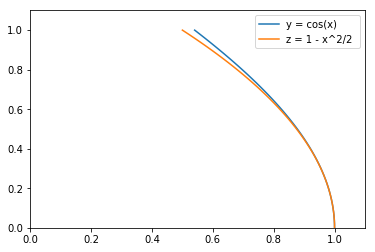

In [27]:
x = np.linspace(0,1)
y = np.cos(x)
z = 1 - x**2/2
plt.plot(y,x,z,x), plt.xlim([0,1.1]), plt.ylim([0,1.1])
plt.legend(['y = cos(x)', 'z = 1 - x^2/2 '])

### 1.2 - Calculus Proof 

We can prove these approximations using [Squeeze Limit Theorem](https://en.wikipedia.org/wiki/Squeeze_theorem). 
Recall, Squeeze Limit Theorem: Consider the functions f,g,h: 
$$ g(x) \leq f(x) \leq h(x)$$

and suppose that we have 
$$ \lim_{x\rightarrow a}g(x) = \lim_{x\rightarrow a} h(x) = L $$ 

Then 
$$\lim_{x\rightarrow a} f(x) = L $$ 

** Proof ** 

$$\lim_{x\rightarrow 0}\frac{\sin(x)}{x} = 1$$

$$\lim_{x\rightarrow 0}\frac{\tan(x)}{x} = 1$$ 

$$\lim_{x\rightarrow 0}\cos(x) = 1 $$ 

## 1.3 - Algebraic Proof 

Consider the Maclaurin Expansion for $\sin(x) = \sum_{n = 0}^\infty \frac{(-1)^n}{(2n+1)!}x^{2n+1}$

In [67]:
# Function by Ricardo Pascal 
## (http://voorloopnul.com/blog/approximating-the-sine-function-with-maclaurin-series-using-python/) 
from decimal import Decimal, getcontext

import math

import collections



getcontext().prec = 1000	



Result = collections.namedtuple('Result', 'input computed iterations target')     



def sin(x, prec=4):

    target = Decimal(math.sin(x))

    n, result = 0, x



    while True:

        if result < target:

            if (abs(result - target) < 1*(10**-prec)):

                break



        n += 1

        positive_or_negative = (-1)**n

        numerator = x**((2*n)+1)

        denominator =  Decimal(math.factorial(((2*n)+1)))

        computed = positive_or_negative * (numerator/denominator)

        result += computed

    return Result(input=x, computed=round(result, prec), iterations=n, target=round(target, prec))


In [68]:
sin(1)

Result(input=1, computed=Decimal('0.8415'), iterations=3, target=Decimal('0.8415'))

## 1.4 - Bhaskara I's Approximation of sin(x) 

[Bhaskara I](https://en.wikipedia.org/wiki/Bhāskara_I) is a mathematician who have an interesting rational approximation for the sine function. 

$$ \sin(x) \approx \frac{16(\pi - x)x}{5\pi^2 - 4(\pi - x)x} $$ 

In [2]:
def bhaskara(x):
    return (16*(np.pi-x)*x)/(5*np.pi**2-4*(np.pi-x)*x)

In [3]:
bhaskara(1)

0.8402181198803792

In [4]:
np.sin(1)

0.8414709848078965

Let's calculate the error: 

In [5]:
np.sin(1)-bhaskara(1)

0.0012528649275173054